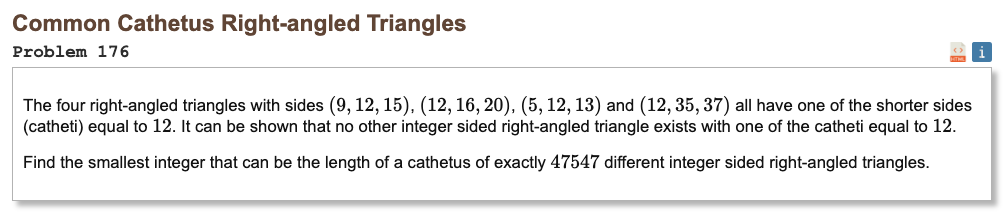

## Initial approach

* write the number of right triangles with leg n as r(n) equals product over odd prime exponents e of n of (2e plus 1) minus 1 all over 2
* target r(n) equals 47547 so we need product over odd primes of (2e plus 1) equals 2 times 47547 plus 1 equals 95095
* factor 95095 equals 5 times 7 times 11 times 13 times 19 which gives odd prime exponents e as 2, 3, 5, 6, 9
* to minimize n assign larger exponents to smaller odd primes in order 3, 5, 7, 11, 13
* the exponent of 2 does not affect r(n), adding any power of 2 only increases n so choose none
* compute n as 3^9 times 5^6 times 7^5 times 11^3 times 13^2 and verify r(n) equals 47547
* print n as the smallest cathetus with exactly 47547 such triangles
* no external libraries are used

In [1]:
def prime_sieve(limit):
    bs = [True] * (limit + 1)
    bs[0] = bs[1] = False
    for i in range(2, int(limit**0.5) + 1):
        if bs[i]:
            step = i
            start = i * i
            bs[start: limit + 1: step] = [False] * (((limit - start) // step) + 1)
    return [i for i, v in enumerate(bs) if v]

def count_triangles(n):
    x = n
    e2 = 0
    while x % 2 == 0:
        x //= 2
        e2 += 1
    prod = 1
    p = 3
    while p * p <= x:
        if x % p == 0:
            e = 0
            while x % p == 0:
                x //= p
                e += 1
            prod *= (2 * e + 1)
        p += 2
    if x > 1:
        prod *= 3
    return (prod - 1) // 2

def solve():
    target = 47547
    exps = [9, 6, 5, 3, 2]
    odd_primes = [3, 5, 7, 11, 13]
    n = 1
    for p, e in zip(odd_primes, exps):
        n *= p ** e
    if count_triangles(n) != target:
        raise RuntimeError("verification failed")
    return n

In [2]:
%%time

result = solve()
print("Result:", result)

Result: 1162696268468109375
CPU times: user 178 μs, sys: 67 μs, total: 245 μs
Wall time: 217 μs
